Name: Mahad Siddique

Email: mahadsiddique07@gmail.com




# **AI 2024 Online Summer Internship**
## **Make Your Place in top 20% AI Engineers of the World**



# **Assignment 3 :**

## **Gender Prediction Model**


# **Step 1: Import Libraries**

In [130]:
import re
import pandas as pd
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import nltk
import joblib
import seaborn as sns
import matplotlib.pyplot as plt

# **Step 2: Load Sample Data**

In [131]:
import pandas as pd

data = pd.read_csv('/content/gender_classification_sample.csv', encoding='latin1')

print("\n\nGender Classificaion Data:")
print("============\n")
pd.set_option("display.max_rows", None, "display.max_columns", None)




Gender Classificaion Data:



## **Step 2.1: View Columns In Dataset**

In [132]:
data.columns

Index(['_unit_id', '_golden', '_unit_state', '_trusted_judgments',
       '_last_judgment_at', 'gender', 'gender:confidence', 'profile_yn',
       'profile_yn:confidence', 'created', 'description', 'fav_number',
       'gender_gold', 'link_color', 'name', 'profile_yn_gold', 'profileimage',
       'retweet_count', 'sidebar_color', 'text', 'tweet_coord', 'tweet_count',
       'tweet_created', 'tweet_id', 'tweet_location', 'user_timezone'],
      dtype='object')

## **Step 2.2: Keeping Required Column In Dataset**

In [133]:
data = data [['gender', 'description']]

print("\n\nGenderCalssification Data:")
print("============\n")
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(data.head())
print(data.tail())



GenderCalssification Data:

   gender                                        description
0    male                              i sing my own rhythm.
1    male  I'm the author of novels filled with family dr...
2    male                louis whining and squealing and all
3    male  Mobile guy.  49ers, Shazam, Google, Kleiner Pe...
4  female  Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...
    gender                                        description
95  female  hi ! my name is Louanne , I am great fan of Ju...
96  female  National Security & Foreign Policy Editor @CQN...
97  female  writer // stoop hen. into books, punk and gin....
98    male  The ultimate gourmet coffee store from espress...
99    male  Christian, Conservative, Baptist, Believer in ...


# **Step 3: Understand and Pre-process Sample Data**

## **Step 3.1: Download and set stopwords**

In [134]:
# Ensure you have downloaded the stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## **Step 3.2: Define a function to clean the text**

In [135]:
# Function to clean the text
def clean_text(text):
    # Remove symbols and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert text to lowercase
    text = text.lower()
    # Remove stop words
    text = ' '.join(word for word in text.split() if word not in stop_words)
    return text

**Function 1: Remove Symbols and Numbers**

In [136]:
def remove_symbols_numbers(text):
    # Remove symbols and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    return text

**Function 2: Convert Text to Lowercase**

In [137]:
def to_lowercase(text):
    # Convert text to lowercase
    text = text.lower()
    return text

**Function 3: Remove Stopwords**

In [138]:
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    # Remove stop words
    text = ' '.join(word for word in text.split() if word not in stop_words)
    return text

## **Step 3.3: Load the data**

In [141]:
# Load the data
data = pd.read_csv('/content/gender_classification_sample.csv', encoding='latin1')

In [142]:
data

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,description,fav_number,gender_gold,link_color,name,profile_yn_gold,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
0,815719226,False,finalized,3,10/26/15 23:24,male,1.0000,yes,1.0000,2012-05-13 1:48,i sing my own rhythm.,0,NaN,08C2C2,sheezy0,NaN,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,NaN,110964,10/26/15 12:40,6.590000e+17,main; @Kan1shk3,Chennai
1,815719227,False,finalized,3,10/26/15 23:30,male,1.0000,yes,1.0000,2010-01-12 13:51,I'm the author of novels filled with family dr...,68,NaN,0084B4,DavdBurnett,NaN,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,ÂÃÃIt felt like they were my friends and I ...,NaN,7471,10/26/15 12:40,6.590000e+17,NaN,Eastern Time (US & Canada)
2,815719228,False,finalized,3,10/26/15 23:33,male,0.6625,yes,1.0000,11/28/14 11:30,louis whining and squealing and all,7696,NaN,ABB8C2,lwtprettylaugh,NaN,https://pbs.twimg.com/profile_images/657330418...,1,C0DEED,i absolutely adore when louis starts the songs...,NaN,5617,10/26/15 12:40,6.590000e+17,clcncl,Belgrade
3,815719229,False,finalized,3,10/26/15 23:10,male,1.0000,yes,1.0000,2006-11-09 22:39,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",202,NaN,0084B4,douggarland,NaN,https://pbs.twimg.com/profile_images/259703936...,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,NaN,1693,10/26/15 12:40,6.590000e+17,"Palo Alto, CA",Pacific Time (US & Canada)
4,815719230,False,finalized,3,10/27/15 1:15,female,1.0000,yes,1.0000,4/16/14 13:23,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,37318,NaN,3B94D9,WilfordGemma,NaN,https://pbs.twimg.com/profile_images/564094871...,0,0,Watching Neighbours on Sky+ catching up with t...,NaN,31462,10/26/15 12:40,6.590000e+17,NaN,NaN
5,815719231,False,finalized,3,10/27/15 1:47,female,1.0000,yes,1.0000,2003-11-10 18:14,you don't know me.,3901,NaN,F5ABB5,monroevicious,NaN,https://pbs.twimg.com/profile_images/656336865...,0,0,"Ive seen people on the train with lamps, chair...",NaN,20036,10/26/15 12:40,6.590000e+17,New York Gritty,Central Time (US & Canada)
6,815719233,False,finalized,3,10/26/15 23:48,male,1.0000,yes,1.0000,2012-03-12 21:54,The secret of getting ahead is getting started.,80,NaN,0000FF,RobinMeske,NaN,https://pbs.twimg.com/profile_images/508875440...,0,C0DEED,Gala Bingo clubs bought for Ã¥Â£241m: The UK's...,NaN,112117,10/26/15 12:40,6.590000e+17,NaN,NaN
7,815719234,False,finalized,3,10/27/15 1:52,female,1.0000,yes,1.0000,2009-08-15 4:50,Pll Fan // Crazy about MCD // Ramen is bae,1825,NaN,9266CC,pigzilla_,NaN,https://pbs.twimg.com/profile_images/658670112...,0,0,@_Aphmau_ the pic defines all mcd fangirls/fan...,NaN,482,10/26/15 12:40,6.590000e+17,NaN,NaN
8,815719235,False,finalized,3,10/27/15 1:49,female,1.0000,yes,1.0000,5/13/11 3:32,"Renaissance art historian, University of Notti...",3115,NaN,9266CC,GabrieleNeher,NaN,https://pbs.twimg.com/profile_images/513327289...,0,FFFFFF,@Evielady just how lovely is the tree this yea...,NaN,26085,10/26/15 12:40,6.590000e+17,"Nottingham, England.",Amsterdam
9,815719238,False,finalized,3,10/26/15 22:20,female,0.6509,yes,1.0000,2008-10-12 5:05,Senior '16 . XI-XII-MMXIV.,3371,NaN,0084B4,kaylanabrewer_,NaN,https://pbs.twimg.com/profile_images/651227967...,0,FFFFFF,Just put my ass on the line for you and this i...,NaN,13585,10/26/15 12:40,6.590000e+17,NaN,Atlantic Time (Canada)


## **Step 3.4: Drop rows with NaN values in the text column**

In [143]:
# Sample data without Droping Rows with NAN Values
print(len(data))

100


In [144]:
# Drop rows with NaN values in the text column
data = data.dropna(subset=['description'])

In [145]:
# Sample data After Droping Rows with NAN Values
print(len(data))

100


## **Step 3.5: Apply Data Cleaning**

In [146]:
data['description']

0                                 i sing my own rhythm.
1     I'm the author of novels filled with family dr...
2                   louis whining and squealing and all
3     Mobile guy.  49ers, Shazam, Google, Kleiner Pe...
4     Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...
5                                    you don't know me.
6       The secret of getting ahead is getting started.
7            Pll Fan // Crazy about MCD // Ramen is bae
8     Renaissance art historian, University of Notti...
9                            Senior '16 . XI-XII-MMXIV.
10    im just here for tÃÃ¼p, bo burnham, and disne...
11                                      JMKMÂ_ÃÂÃ¼Â
12    Over enthusiastic F1 fan.  Model collector, mu...
13    Artisan specializing in paper mache, print-mak...
14         He bled and died to take away my sins ÂÃÃ
15                                         union j xxxx
16                            You had me from the start
17                        BSc economics graduate

**Apply function to remove symbols and numbers**

In [147]:
data['description'] = data['description'].apply(remove_symbols_numbers)

**See data again to see the implementation of removal of symbols and numbers**

In [148]:
data['description']

0                                  i sing my own rhythm
1     Im the author of novels filled with family dra...
2                   louis whining and squealing and all
3     Mobile guy  ers Shazam Google Kleiner Perkins ...
4     Ricky Wilson The Best FRONTMANKaiser Chiefs Th...
5                                      you dont know me
6        The secret of getting ahead is getting started
7                Pll Fan  Crazy about MCD  Ramen is bae
8     Renaissance art historian University of Nottin...
9                                   Senior   XIXIIMMXIV
10      im just here for tp bo burnham and disney world
11                                                 JMKM
12    Over enthusiastic F fan  Model collector music...
13    Artisan specializing in paper mache printmakin...
14               He bled and died to take away my sins 
15                                         union j xxxx
16                            You had me from the start
17                         BSc economics graduat

**Apply function to convert to lower case**

In [151]:
data['description'] = data['description'].apply(to_lowercase)

In [152]:
data['description']

0                                  i sing my own rhythm
1     im the author of novels filled with family dra...
2                   louis whining and squealing and all
3     mobile guy  ers shazam google kleiner perkins ...
4     ricky wilson the best frontmankaiser chiefs th...
5                                      you dont know me
6        the secret of getting ahead is getting started
7                pll fan  crazy about mcd  ramen is bae
8     renaissance art historian university of nottin...
9                                   senior   xixiimmxiv
10      im just here for tp bo burnham and disney world
11                                                 jmkm
12    over enthusiastic f fan  model collector music...
13    artisan specializing in paper mache printmakin...
14               he bled and died to take away my sins 
15                                         union j xxxx
16                            you had me from the start
17                         bsc economics graduat

**Apply function to remove stop words**

In [153]:
data['desciption'] = data['description'].apply(remove_stopwords)

In [154]:
data['desciption']

0                                           sing rhythm
1          im author novels filled family drama romance
2                               louis whining squealing
3     mobile guy ers shazam google kleiner perkins y...
4     ricky wilson best frontmankaiser chiefs best b...
5                                             dont know
6                  secret getting ahead getting started
7                           pll fan crazy mcd ramen bae
8     renaissance art historian university nottingha...
9                                     senior xixiimmxiv
10                        im tp bo burnham disney world
11                                                 jmkm
12    enthusiastic f fan model collector music fan f...
13    artisan specializing paper mache printmaking f...
14                             bled died take away sins
15                                         union j xxxx
16                                                start
17                          bsc economics gradua

**Following function contains the all three tasks for the sake of simplicity we dividied it in three parts**

In [155]:
# Clean the 'tweet' column
data['description'] = data['description'].apply(clean_text)

## **Step 3.6: Data After Processing**

In [156]:
print("\n\nGender Classification Data After Preprocessing:")
print("=================================================\n")
pd.set_option("display.max_rows", None, "display.max_columns", None)

print(data.head())
print(data.tail())



Gender Classification Data After Preprocessing:

    _unit_id  _golden _unit_state  _trusted_judgments _last_judgment_at  \
0  815719226    False   finalized                   3    10/26/15 23:24   
1  815719227    False   finalized                   3    10/26/15 23:30   
2  815719228    False   finalized                   3    10/26/15 23:33   
3  815719229    False   finalized                   3    10/26/15 23:10   
4  815719230    False   finalized                   3     10/27/15 1:15   

   gender  gender:confidence profile_yn  profile_yn:confidence  \
0    male             1.0000        yes                    1.0   
1    male             1.0000        yes                    1.0   
2    male             0.6625        yes                    1.0   
3    male             1.0000        yes                    1.0   
4  female             1.0000        yes                    1.0   

            created                                        description  \
0   2012-05-13 1:48        

**We have to show description first and than to show the sentiment type to make things standardized**

In [157]:
data = data[['description','gender']]

In [158]:
data

,description,gender
0,sing rhythm,male
1,im author novels filled family drama romance,male
2,louis whining squealing,male
3,mobile guy ers shazam google kleiner perkins y...,male
4,ricky wilson best frontmankaiser chiefs best b...,female
5,dont know,female
6,secret getting ahead getting started,male
7,pll fan crazy mcd ramen bae,female
8,renaissance art historian university nottingha...,female
9,senior xixiimmxiv,female


## **Step 3.7: Saving Cleaned Data as Seperate CSV File**

In [159]:
data.to_csv("cleaned_gender_tweets.csv", index=False)

In [160]:
data.columns

Index(['description', 'gender'], dtype='object')

# **Step 4: Splitting Sample Data into Training Data and Testing Data**

## **Splitting Data into Features and Labels**

In [161]:
data = pd.read_csv('cleaned_gender_tweets.csv')
X = data['description']
y = data['gender']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=50)

In [162]:
print(len(X_train))
print(len(X_test))

50
50


In [163]:
X_train

13    artisan specializing paper mache printmaking f...
46                               retired bad girl queen
27    militante obrero de los sueos revolucionarios ...
24            free bros ebk otr real kno grind wea come
28                        baby im perfect niallofficial
65               trust people like big butts cannot lie
7                           pll fan crazy mcd ramen bae
88              ento est bem sporting clube de portugal
61    maker conceptor creative developer xbacabd con...
97    writer stoop hen books punk gin writes cash iq...
77    born london grew basildon lived cornwall sea m...
73                 computer engineer khalifa university
63       retro modernist suffering unsightly visibility
29    kennedy j abulala ni mwalimu anayeienzi kazi y...
0                                           sing rhythm
51    wife tidy boy amadeus director ideal place pro...
10                        im tp bo burnham disney world
74               studying dillard university drw

In [164]:
X_test

80    brain bodily organ starts working moment awake...
79    journalist producer camanpour cnni always open...
25                              penn state alum classof
15                                         union j xxxx
39                                          curious guy
40                                           like sleep
53                         lover truth seeker knowledge
17                          bsc economics graduate coys
57    hi name angela friends call angie boring life ...
50    like snow beautiful cold im legal drug dealer ...
18          wife coach mom eight troops follower christ
69                                    freeza ripnazerah
87                  everything need news crews presence
16                                                start
47                                     walk faith sight
3     mobile guy ers shazam google kleiner perkins y...
38         control jpn version zoeojbot rayarkimplosion
52    lie gets halfway around world truth chance

## **Step 4.1: Feature Extraction**

In [165]:
# Initialize the TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=10)

In [166]:
# Replace NaN values with an empty string or a placeholder
X_train = X_train.fillna('')



# Fit the vectorizer on the training data
vectorizer.fit(X_train)

TfidfVectorizer(max_features=10)

**Transforming the Training Data**

In [167]:
# Transform the training data
X_train_tfidf = vectorizer.transform(X_train)

In [168]:
# Convert the TF-IDF sparse matrix to a DataFrame
X_train_tfidf_df = pd.DataFrame(X_train_tfidf.toarray(), columns=vectorizer.get_feature_names_out())

print("\nTF-IDF Features DataFrame:")
print(X_train_tfidf_df.head())



TF-IDF Features DataFrame:
   art  ask  beautiful  best  chicago   de  dont  follow  girl   im
0  1.0  0.0        0.0   0.0      0.0  0.0   0.0     0.0   0.0  0.0
1  0.0  0.0        0.0   0.0      0.0  0.0   0.0     0.0   1.0  0.0
2  0.0  0.0        0.0   0.0      0.0  1.0   0.0     0.0   0.0  0.0
3  0.0  0.0        0.0   0.0      0.0  0.0   0.0     0.0   0.0  0.0
4  0.0  0.0        0.0   0.0      0.0  0.0   0.0     0.0   0.0  1.0


**Transforming and Converting the Test Data**

In [169]:
# Transform the training data
X_test_tfidf = vectorizer.transform(X_test)

# Convert the TF-IDF sparse matrix to a DataFrame
X_test_tfidf_df = pd.DataFrame(X_test_tfidf.toarray(), columns=vectorizer.get_feature_names_out())

print("\nTF-IDF Features DataFrame:")
print(X_test_tfidf_df.head())


TF-IDF Features DataFrame:
   art  ask  beautiful  best  chicago   de  dont  follow  girl   im
0  0.0  0.0        0.0   0.0      0.0  0.0   0.0     0.0   0.0  0.0
1  0.0  0.0        0.0   0.0      0.0  0.0   0.0     0.0   0.0  0.0
2  0.0  0.0        0.0   0.0      0.0  0.0   0.0     0.0   0.0  0.0
3  0.0  0.0        0.0   0.0      0.0  0.0   0.0     0.0   0.0  0.0
4  0.0  0.0        0.0   0.0      0.0  0.0   0.0     0.0   0.0  0.0


# **Step 6: Execute the Training Phase**

## **Step 6.1: Training Data and Testing Data**

## **Step 6.2: Train the model**

In [170]:
# Training the model
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

MultinomialNB()

## **Step 6.3: Save the trained model**

In [171]:
# Save the model to disk
joblib.dump(model, 'naive_bayes_model.pkl')

# Save the vectorizer to disk
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')


['tfidf_vectorizer.pkl']

# **Step 7: Execute the Testing Phase**

## **Step 7.1: Load the Saved Model**

In [172]:
import joblib

# Load the model from disk
loaded_model = joblib.load('naive_bayes_model.pkl')

# Load the vectorizer from disk
loaded_vectorizer = joblib.load('tfidf_vectorizer.pkl')

print(f"Model loaded from 'naive_bayes_model.pkl'")


Model loaded from 'naive_bayes_model.pkl'


## **Step 7.2: Evaluate the Machine Learning Model**

In [173]:
# Transform the test data using the loaded vectorizer
X_test_tfidf_loaded = loaded_vectorizer.transform(X_test)

# Evaluate the loaded model
y_pred_loaded = loaded_model.predict(X_test_tfidf_loaded)
accuracy_loaded = accuracy_score(y_test, y_pred_loaded)
report_loaded = classification_report(y_test, y_pred_loaded)

print(f"Accuracy: {accuracy_loaded}")
print("Classification Report:")
print(report_loaded)

Accuracy: 0.4
Classification Report:
              precision    recall  f1-score   support

      female       0.40      1.00      0.57        20
        male       0.00      0.00      0.00        30

    accuracy                           0.40        50
   macro avg       0.20      0.50      0.29        50
weighted avg       0.16      0.40      0.23        50



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## **Step 7.3: Displaying the Confusion Matrix**

Confusion Matrix:
[[20  0]
 [30  0]]


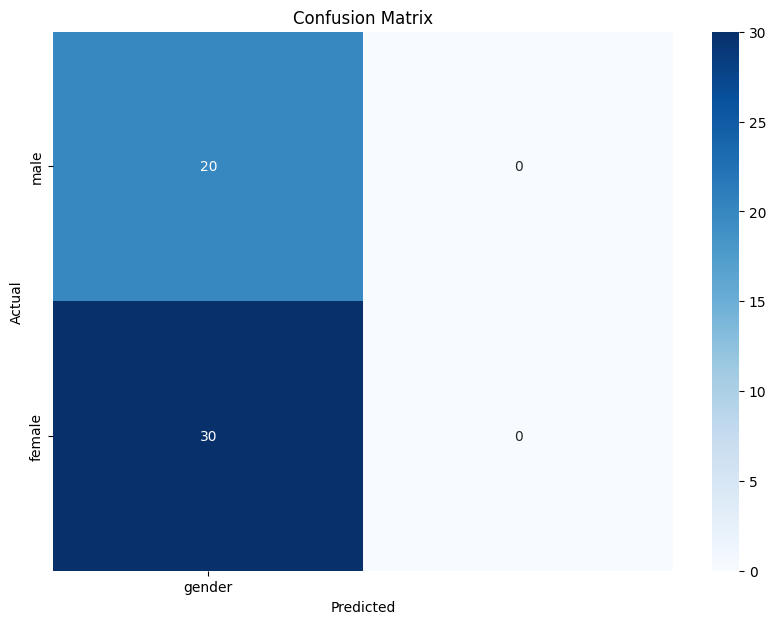

In [175]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_loaded)
print("Confusion Matrix:")
print(conf_matrix)

# Plot Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['gender'], yticklabels=['male', 'female'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# **Step 8: Execute the Application Phase**

## **Step 8.1: Take Input from User, Preprocess it**

In [177]:
# Preprocess the user input
def preprocess_user_input(text):
    stop_words = set(stopwords.words('english'))
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()
    text = ' '.join(word for word in text.split() if word not in stop_words)
    return text

try:
    # Take user input
    user_input = input("Please enter your text: ").strip()
    cleaned_input = preprocess_user_input(user_input)
    print("Processed Input:", cleaned_input)
except KeyboardInterrupt:
    print("\nInput was interrupted. Exiting gracefully.")




Input was interrupted. Exiting gracefully.


## **Step 8.2: Load the Saved Model**

In [179]:
# Load the vectorizer and the model (ensure these are the same as used during training)
vectorizer = joblib.load('tfidf_vectorizer.pkl')
model = joblib.load('naive_bayes_model.pkl')

## **Step 8.3: Transform the user input using the loaded vectorizer**

In [180]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Sample user input after preprocessing
cleaned_input = "successful rest assured covid best vaccine irritate eyes time"

# Assume vectorizer is a previously fitted TfidfVectorizer
# For demonstration, we'll create and fit the vectorizer here (in practice, use the saved model)
corpus = [
    "This is a sample document.",
    "Another sample document for TF-IDF.",
    "More data to test TF-IDF vectorizer."
]
vectorizer = TfidfVectorizer()
vectorizer.fit(corpus)  # Normally, this would be fitted on your actual training data

# Transform the cleaned input using the vectorizer
X_test_tfidf_loaded = vectorizer.transform([cleaned_input])  # Wrap the cleaned input in a list

# Convert the TF-IDF sparse matrix to a DataFrame
X_test_tfidf_loaded_df = pd.DataFrame(X_test_tfidf_loaded.toarray(), columns=vectorizer.get_feature_names_out())

print("\nTF-IDF Features DataFrame for User Input:")
print(X_test_tfidf_loaded_df)



TF-IDF Features DataFrame for User Input:
   another  data  document  for  idf   is  more  sample  test   tf  this   to  \
0      0.0   0.0       0.0  0.0  0.0  0.0   0.0     0.0   0.0  0.0   0.0  0.0   

   vectorizer  
0         0.0  


In [181]:
# Transform the user input using the loaded vectorizer
user_input_tfidf = vectorizer.transform([cleaned_input])

## **Step 8.4: Predict the Gender of the user input**




In [184]:
# Assuming X_test_tfidf_df contains a single instance

# Predict the gender probabilities for the single instance
gender_probabilities = model.predict_proba(X_test_tfidf_df)

# Handle NaN values if any (fill NaNs with a default value if necessary)
gender_probabilities = np.nan_to_num(gender_probabilities)

# Get the index of the highest probability for the single instance
predicted_index = np.argmax(gender_probabilities, axis=1)[0]

# List of possible genders (ensure this matches the model's output classes)
genders = ['male', 'female']

# Map the predicted index to the corresponding gender
predicted_gender = genders[predicted_index]

# Output the gender prediction
print(f"The predicted gender is: {predicted_gender}")


The predicted gender is: male


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but MultinomialNB was fitted without feature names
  warnings.warn(


# **Step 9: Execute the Feedback Phase**

**A Two-Step Process**

**Step 01:** After some time, take Feedback from

o    Domain Experts and Users on deployed Titanic Passenger Survival Prediction System

**Step 02:** Make a List of Possible Improvements based on Feedback received

# **Step 10: Improve Model based on Feedback**

There is Always Room for Improvement

Based on Feedback from Domain Experts and Users

o    Improve your Model

In [186]:
!pip install nbconvert
# Convert notebook to HTML using nbconvert
notebook_file = '/content/gender_prediction.ipynb'
!jupyter nbconvert --to html $notebook_file

[NbConvertApp] Converting notebook /content/gender_prediction.ipynb to html
[NbConvertApp] Writing 845145 bytes to /content/gender_prediction.html
